# CA03 – Decision Tree Algorithm

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import sklearn

#import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics


In [2]:
#get the data
url = 'https://github.com/ArinB/MSBA-CA-Data/blob/main/CA03/census_data.csv?raw=true'
data = pd.read_csv(url, encoding = 'ISO-8859-1')

# Part 1

## 1. Data Quality Analysis (DQA)

In [3]:
#inspect the shape of the data
data.shape 

(48842, 11)

In [4]:
#inspect first few rows
data.head()

hours_per_week_bin occupation_bin  msr_bin  ...            age_bin   flag  y
0           b. 31-40   b. Mid - Low   b. Mid  ...   d. 36-40 & 56-60  train  0
1            a. 0-30        e. High  c. High  ...           e. 40-55  train  0
2           b. 31-40         a. Low   b. Mid  ...   d. 36-40 & 56-60  train  0
3           b. 31-40         a. Low  c. High  ...           e. 40-55  train  0
4           b. 31-40        e. High  c. High  ...  b. 26-30 & 71-100  train  0

[5 rows x 11 columns]

In [5]:
#inspect last few rows
data.tail()

hours_per_week_bin occupation_bin  msr_bin  ...           age_bin  flag  y
48837           b. 31-40        e. High   b. Mid  ...  d. 36-40 & 56-60  test  0
48838           b. 31-40   b. Mid - Low   a. Low  ...  c. 31-35 & 61-70  test  0
48839   d. 41-50 & 61-70        e. High  c. High  ...  d. 36-40 & 56-60  test  0
48840           b. 31-40   b. Mid - Low   a. Low  ...          e. 40-55  test  0
48841           e. 51-60        e. High  c. High  ...  c. 31-35 & 61-70  test  1

[5 rows x 11 columns]

In [6]:
# checking missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


## 2. Exploratory Data Analysis (EDA)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [8]:
#creating a function for plotting a categorical variable 
def plot_categories(data, column_number):
    data = data
    column_class = data.iloc[:, [column_number,10]] #get the column values and the prediction class
    column_name = column_class.columns[0] #get the column name (categorical variable)
    
    plot_data = column_class.groupby([column_name], as_index = False).agg('mean') #calculate the ratio of 0 and 1
    
    plot_data['flag, 0'] = (1 - plot_data['y'])*100 #create 2 columns and transorm ratios into percentages
    plot_data['flag, 1'] = plot_data['y']*100
    plot_data = plot_data.drop(columns = ['y']) #drop the original agg column
    
    plot_data.plot( x = column_name, kind='bar', stacked=True, #plot the results using matplotlib
            title='Percentage of salaries |<=50k:0, >50k:1| by ------' + column_name)
    plt.legend(loc="right", bbox_to_anchor=(1.3, 0.5))

In [9]:
#creating a function that plots all categorical variables
def plot_all_categories(data):
    for i in range(len(data.columns)-1):
        plot_categories(data, i)

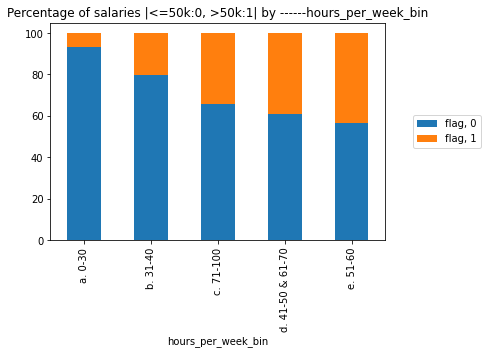

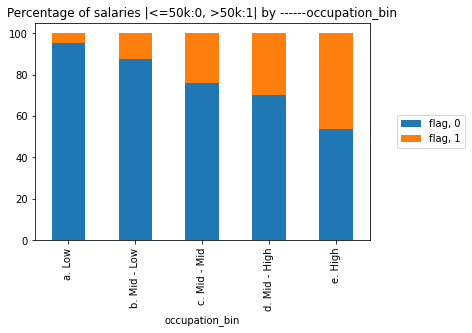

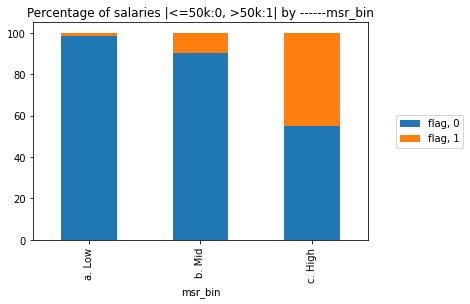

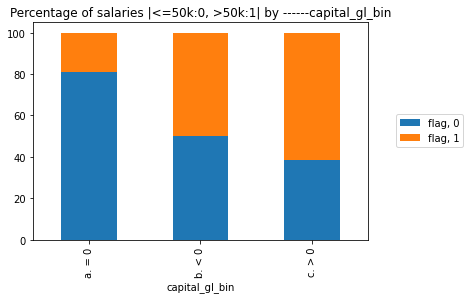

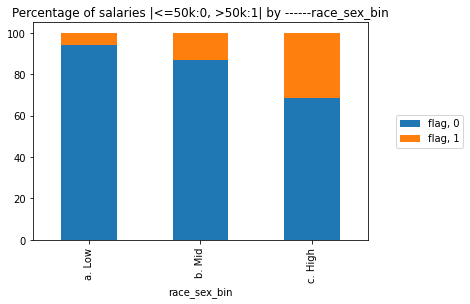

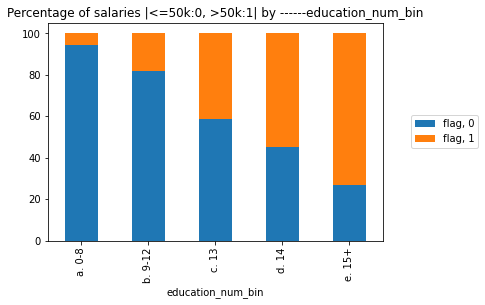

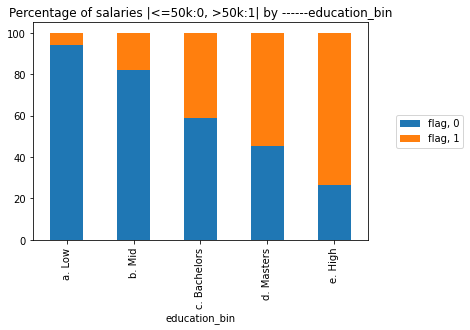

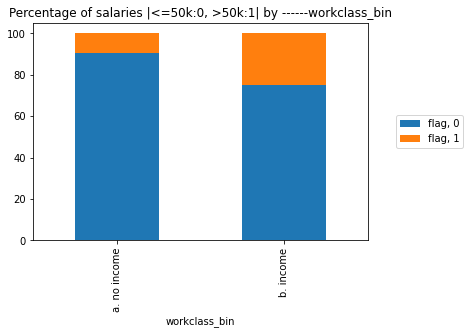

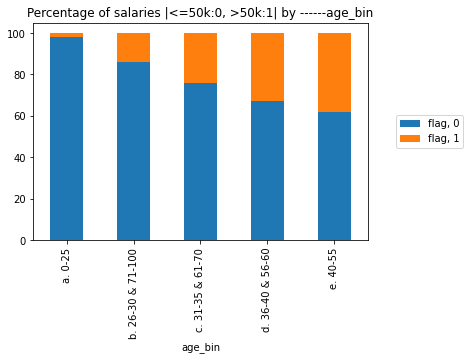

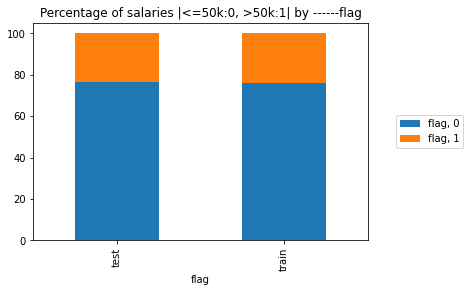

In [10]:
#plot all categorical variables in the dataset
plot_all_categories(data)

In [11]:
data.describe() #Judging by the mean there is a disbalance in the data. We can fix it.

y
count  48842.000000
mean       0.239282
std        0.426649
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

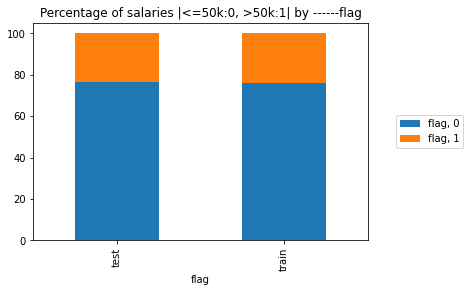

In [12]:
#we can see that the data is imbalanced there are much more 0's than 1's
plot_categories(data, 9)

## Fixing imbalanced data

In [13]:
#fixing the imbalanced data

In [14]:
#how many observations of each class do we have
print(data[data['y']==1].shape)
print(data[data['y']==0].shape)

(11687, 11)
(37155, 11)


In [15]:
#sampling the same number of observations as 1's
sampled_0 = data[data['y']==0].sample(n = 11687, replace=False, random_state=101)
sampled_0.shape

(11687, 11)

In [16]:
#creating the correected dataset
data = data[data['y']==1].append(sampled_0)
data.shape

(23374, 11)

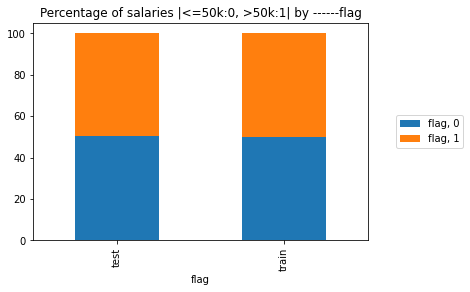

In [17]:
plot_categories(data, 9)
#now it's nice and balanced

# Part 2

## 3. Build Decision Tree Classifier Models

In [18]:
#label encoding to feed into decision tree
le_list = []
le_data = data.copy()
for i in range(len(le_data.columns)-1):
  le_list.append(preprocessing.LabelEncoder())
  le_data.iloc[:,i] = le_list[i].fit_transform(le_data.iloc[:,i])
  print(i, le_list[i].classes_)
le_data.head()

0 ['a. 0-30' 'b. 31-40' 'c. 71-100' 'd. 41-50 & 61-70' 'e. 51-60']
1 ['a. Low' 'b. Mid - Low' 'c. Mid - Mid' 'd. Mid - High' 'e. High']
2 ['a. Low' 'b. Mid' 'c. High']
3 ['a. = 0' 'b. < 0' 'c. > 0']
4 ['a. Low' 'b. Mid' 'c. High']
5 ['a. 0-8' 'b. 9-12' 'c. 13' 'd. 14' 'e. 15+']
6 ['a. Low' 'b. Mid' 'c. Bachelors' 'd. Masters' 'e. High']
7 ['a. no income' 'b. income']
8 ['a. 0-25' 'b. 26-30 & 71-100' 'c. 31-35 & 61-70' 'd. 36-40 & 56-60'
 'e. 40-55']
9 ['test' 'train']


hours_per_week_bin  occupation_bin  msr_bin  ...  age_bin  flag  y
7                    3               4        2  ...        4     1  1
8                    3               4        1  ...        2     1  1
9                    1               4        2  ...        4     1  1
10                   2               4        2  ...        3     1  1
11                   1               4        2  ...        1     1  1

[5 rows x 11 columns]

In [19]:
# splitting data into train and test
train_data = le_data[le_data['flag'] == 1]
test_data = le_data[le_data['flag'] == 0]

In [20]:
#further splitting into X and y
X_train = train_data.iloc[:,0:9]
y_train = train_data.iloc[:,10]
X_test = test_data.iloc[:,0:9]
y_test = test_data.iloc[:,10]

X_test.head()

hours_per_week_bin  occupation_bin  ...  workclass_bin  age_bin
32563                   1               3  ...              1        1
32564                   1               1  ...              1        4
32568                   1               4  ...              1        2
32571                   1               1  ...              1        2
32575                   3               1  ...              1        4

[5 rows x 9 columns]

In [21]:
#creating the first tree
dtree = DecisionTreeClassifier(max_depth = 3, 
                               random_state = 101, 
                               max_features = None, 
                               min_samples_leaf = 15)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

## 4. Visualize Your Decision Tree using GraphViz

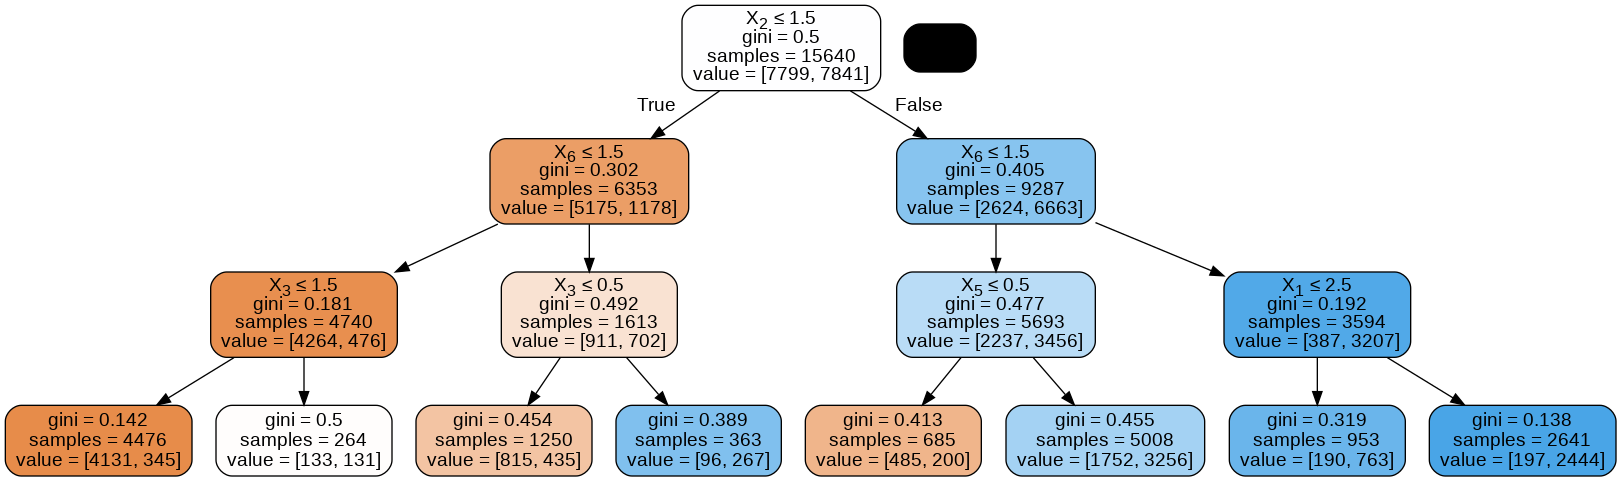

In [22]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 5. Evaluate Decision Tree Performance

In [23]:
def model_performance(y_test, y_pred, dtree, printing = 0):
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  scores = pd.DataFrame(data = {'Accuracy': [accuracy], 
            'Recall': [recall], 
            'Precision': [precision],
            'F1 score': [f1]})
  
  if printing: #i printing = 1 prints out the results
    print('')
    print('Confusion Matrix:')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('TP:', tp)
    print('TN:', tn)
    print('FP:', fp)
    print('FN:', fn)
    print('')
    metrics.plot_roc_curve(dtree, X_test, y_test)
  return scores


Confusion Matrix:
TP: 3301
TN: 2852
FP: 1036
FN: 545



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Accuracy    Recall  Precision  F1 score
0  0.795578  0.858294   0.761125  0.806795

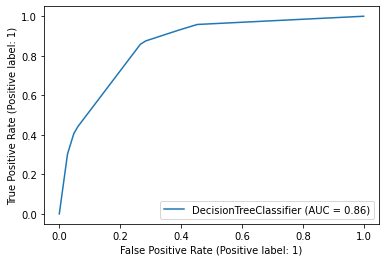

In [24]:
model_performance(y_test, y_pred, dtree, 1)

# Part 3

## 6. Tune Decision Tree Performance

In [25]:
#create a function for tuning 1 the tree (later will be automated)
def train_a_tree(criterion, min_samples_split, min_samples_leaf, max_depth):
  dtree = DecisionTreeClassifier(max_depth = max_depth, 
                               random_state = 101, 
                               max_features = None,
                               criterion = criterion,
                               min_samples_leaf = min_samples_leaf,
                               min_samples_split = min_samples_split)
  dtree.fit(X_train, y_train)
  y_pred = dtree.predict(X_test)
  return dtree, y_pred

In [26]:
dtree, y_pred = train_a_tree('gini', 2, 1, 10)
model_performance(y_test, y_pred, dtree)

Accuracy    Recall  Precision  F1 score
0  0.810189  0.849714   0.785955  0.816592

## 7. Conclusion (please see after autotuning)
### Please see conclusion after the tuning automation

# Part 4

## 8. Automation of Performance Tuning

In [27]:
#create a function for hyper parameter tuning
def hp_auto_tuning(criterion, min_samples_split, min_samples_leaf, max_depth):
  #creating an empty dataframe
  hyper_par = pd.DataFrame(columns = ['criterion', 'min_samples_split', 'min_samples_leaf', 'max_depth', 
                                  'accuracy','recall', 'precision', 'F1_score' ])
  for cr in criterion:
    for ms in min_samples_split:
      for ml in min_samples_leaf:
        for md in max_depth:
          dtree, y_pred = train_a_tree(cr, ms, ml, md)
          scores = model_performance(y_test, y_pred, dtree)
          hyper_par = hyper_par.append({'criterion': cr, 
                                'min_samples_split':ms,
                                'min_samples_leaf':ml,
                                'max_depth':md,
                                'accuracy': scores.iloc[0,0],
                                'recall':scores.iloc[0,1],
                                'precision': scores.iloc[0,2],
                                'F1_score': scores.iloc[0,3]}, ignore_index = True)
  return hyper_par

In [28]:
#specify testing parameters
criterion = ['gini', 'entropy']
min_samples_split = [2, 100]
min_samples_leaf = [1,3]
max_depth = [3, 100]

results = hp_auto_tuning(criterion, min_samples_split, min_samples_leaf, max_depth)
results

criterion min_samples_split min_samples_leaf  ...    recall  precision  F1_score
0       gini                 2                1  ...  0.858294   0.761125  0.806795
1       gini                 2                1  ...  0.812793   0.790792  0.801641
2       gini                 2                3  ...  0.858294   0.761125  0.806795
3       gini                 2                3  ...  0.827093   0.793861  0.810136
4       gini               100                1  ...  0.858294   0.761125  0.806795
5       gini               100                1  ...  0.852314   0.789499  0.819705
6       gini               100                3  ...  0.858294   0.761125  0.806795
7       gini               100                3  ...  0.852314   0.789499  0.819705
8    entropy                 2                1  ...  0.898856   0.733970  0.808088
9    entropy                 2                1  ...  0.814093   0.791256  0.802512
10   entropy                 2                3  ...  0.898856   0.733970  0.808088
11   entropy                 2                3  ...  0.825273   0.792905  0.808765
12   entropy               100                1  ...  0.898856   0.733970  0.808088
13   entropy               100                1  ...  0.844514   0.795688  0.819374
14   entropy               100                3  ...  0.898856   0.733970  0.808088
15   entropy               100                3  ...  0.845294   0.795449  0.819614

[16 rows x 8 columns]

In [29]:
#best hyperparameters for accuracy
results.iloc[results['accuracy'].idxmax(), :]

criterion             entropy
min_samples_split         100
min_samples_leaf            3
max_depth                 100
accuracy             0.814973
recall               0.845294
precision            0.795449
F1_score             0.819614
Name: 15, dtype: object

## Conclusion

Explain your observations from the above performance tuning effort.

Q.8.1 How long was your total run time to train the model?

    total runtime < 1s

Q.8.2 Did you find the BEST TREE?

    Yes, the folowing are the parameters of my best tree.
    criterion             entropy
    min_samples_split         100
    min_samples_leaf            3
    max_depth                 100
    accuracy             0.814973
    recall               0.845294
    precision            0.795449
    F1_score             0.819614

Q.8.3 Draw the Graph of the BEST TREE Using GraphViz

    PLease see below.

Q.8.4 What makes it the best tree?

    Reasonable size and high performance metrics make it the best tree.


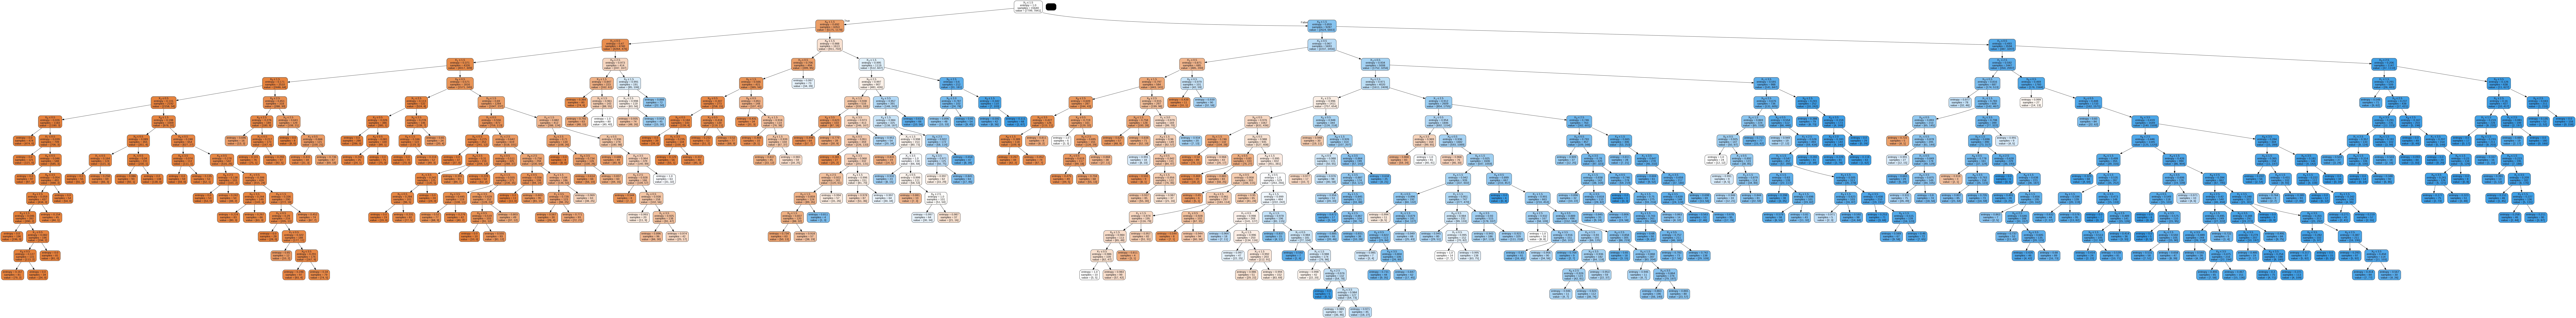

In [30]:
#training the best tree
best_dtree, y_pred = train_a_tree('entropy', 100, 3, 100)
dot_data = StringIO()
export_graphviz(best_dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Part 5

## 9. Prediction using your “trained” Decision Tree Model

In [31]:
#getting the original bin names to convert individual data
for i in range(len(data.columns)-1):
  print(data.columns[i])
  print(data.iloc[:, i].unique())
  print('')

hours_per_week_bin
['d. 41-50 & 61-70' 'b. 31-40' 'c. 71-100' 'e. 51-60' 'a. 0-30']

occupation_bin
['e. High' 'c. Mid - Mid' 'd. Mid - High' 'b. Mid - Low' 'a. Low']

msr_bin
['c. High' 'b. Mid' 'a. Low']

capital_gl_bin
['a. = 0' 'c. > 0' 'b. < 0']

race_sex_bin
['c. High' 'b. Mid' 'a. Low']

education_num_bin
['b. 9-12' 'd. 14' 'c. 13' 'e. 15+' 'a. 0-8']

education_bin
['b. Mid' 'd. Masters' 'c. Bachelors' 'e. High' 'a. Low']

workclass_bin
['b. income' 'a. no income']

age_bin
['e. 40-55' 'c. 31-35 & 61-70' 'd. 36-40 & 56-60' 'b. 26-30 & 71-100'
 'a. 0-25']

flag
['train' 'test']



In [32]:
#individual data
# • Hours Worked per Week = 48
# • Occupation Category = Mid - Low
# • Marriage Status & Relationships = High
# • Capital Gain = Yes
# • Race-Sex Group = Mid
# • Number of Years of Education = 12
# • Education Category = High
# • Work Class = Income
# • Age = 58

In [33]:
#creating a dataframe with individual_data
new_individual = pd.DataFrame(X_test.iloc[0, :]).transpose().reset_index(drop = True)
new_individual['hours_per_week_bin'] = 'd. 41-50 & 61-70'
new_individual['occupation_bin'] = 'b. Mid - Low'
new_individual['msr_bin'] = 'c. High'
new_individual['capital_gl_bin'] = 'c. > 0'
new_individual['race_sex_bin'] = 'b. Mid'
new_individual['education_num_bin'] = 'b. 9-12'
new_individual['education_bin'] = 'e. High'
new_individual['workclass_bin'] = 'b. income'
new_individual['age_bin'] = 'd. 36-40 & 56-60'
new_individual

hours_per_week_bin occupation_bin  ... workclass_bin           age_bin
0   d. 41-50 & 61-70   b. Mid - Low  ...     b. income  d. 36-40 & 56-60

[1 rows x 9 columns]

In [34]:
#transfotming new_individual for prediction
for i in range(len(new_individual.columns)):
  new_individual.iloc[:,i] = le_list[i].transform(new_individual.iloc[:,i])
new_individual.head()

hours_per_week_bin  occupation_bin  ...  workclass_bin  age_bin
0                   3               1  ...              1        3

[1 rows x 9 columns]

In [35]:
#training the best tree
best_dtree, y_pred = train_a_tree('entropy', 100, 3, 100)

## The actual prediction [1]

In [36]:
#predicting new_individual income
best_dtree.predict(new_individual)
# 1 means the income is more than 50k

array([1])


Confusion Matrix:
TP: 3251
TN: 3052
FP: 836
FN: 595



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Accuracy    Recall  Precision  F1 score
0  0.814973  0.845294   0.795449  0.819614

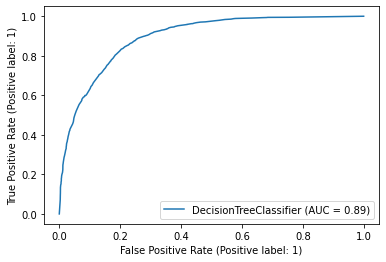

In [37]:
#evaluating model performance of the best tree
model_performance(y_test, y_pred, best_dtree, 1)

## 10. Deliverables

All deliverables were delivered on time and in full. 

# Thank you for reading this Notebook till the end!